## Ejercicio 3
### Regresión Lineal

Trabajaremos con un conjunto de datos del censo de EE. UU. ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

A muchas empresas les gustaría personalizar su oferta en función de los ingresos del cliente. Los clientes de altos ingresos podrían, por ejemplo, estar expuestos a productos premium. Como los ingresos de un cliente no siempre se conocen explícitamente, el modelo predictivo podría estimar los ingresos de una persona en función de otra información.

Nuestro objetivo es crear un modelo predictivo que pueda generar una estimación del ingreso de una persona.

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/vanejaime/Curso_Python_CD/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [3]:
income.shape

(32561, 15)

# Punto 3.1 

¿Cuál es la relación entre la edad y los ingresos?

Para un aumento del uno por ciento en la Edad, ¿cuánto aumenta el ingreso?

Usando sklearn estimar una regresión lineal y predecir solo con la variable edad. Cual es el ingreso cuando la edad esta entre los 30 y 40 años (Grafique)

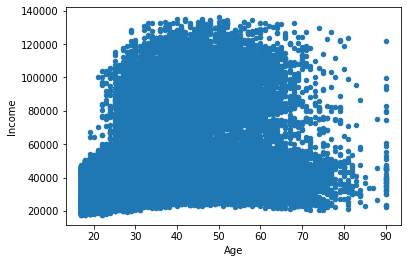

In [4]:
income.plot(x='Age', y='Income', kind='scatter')

No se evidencia una relacion clara entre la edad y el ingreso, en la grafica se evidencia una nube de puntos,
lo que hace que cualquier linea que pase por dicha nube puede ajustarse a una regresion lineal

In [5]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

In [6]:
x=income["Age"].values
x=x.reshape(-1,1)
y=income["Income"].values

In [7]:
lm=linear_model.LinearRegression()

In [8]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print ("Ingreso=", lm.intercept_,"+",lm.coef_,"*edad")

Ingreso= 32538.088130868626 + [542.16765707] *edad


In [44]:
edades=[[30],[31],[32],[33],[34],[35],[36],[37],[38],[39],[40]]
edades_=np.arange(30,41,1)

In [47]:
d1=pd.DataFrame(lm.predict(edades))
d1['Edad'] = edades_

In [48]:
cambio_nom = {0:"Ingreso"}
d1.rename(columns=cambio_nom, inplace=True)
d1.head()

,Ingreso,Edad
0,48803.117843,30
1,49345.285500,31
2,49887.453157,32
3,50429.620814,33
4,50971.788471,34


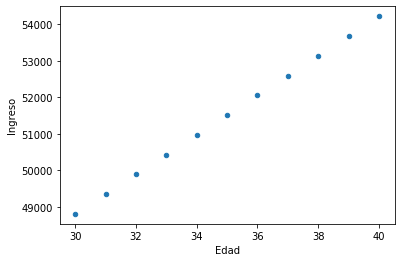

In [50]:
d1.plot(x='Edad', y='Ingreso', kind='scatter')

# Punto 3.2
Evalue el modelo usando las metricas vistas (MAE,MSE,RMSE)

In [51]:
from sklearn import metrics

In [52]:
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred1))

MSE: 593783043.8402299


# Punto 3.3


Estime una regresion usando mas variables. Inprima los coeficientes hallados.


In [54]:
#Voy a usar solo variables continuas
x3=income.drop("Workclass",axis=1)
x3=x3.drop("Education",axis=1)
x3=x3.drop("Martial Status",axis=1)
x3=x3.drop("Occupation",axis=1)
x3=x3.drop("Relationship",axis=1)
x3=x3.drop("Race",axis=1)
x3=x3.drop("Sex",axis=1)
x3=x3.drop("Country",axis=1)
x3=x3.drop("Income",axis=1)
x3.head()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [55]:
lm3=linear_model.LinearRegression()
y3=income["Income"].values

In [56]:
lm3.fit(x3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
result=pd.DataFrame({"Variables":x3.columns,"Coeficientes_Estimados":lm3.coef_})
result.loc[len(result)]=["Intercepto",lm3.intercept_]
result

,Variables,Coeficientes_Estimados
0,Age,464.855677
1,fnlwgt,0.006040
2,Education-Num,3651.819123
3,Capital Gain,0.474865
4,Capital Loss,6.172433
5,Hours per week,405.376825
6,Intercepto,-19881.119966


# Punto 3.4


Evalue el modelo anterior usando las metricas vistas (MAE,MSE,RMSE)

¿Cómo es el rendimiento con el uso de la edad unicamente?

In [58]:
w_pred=lm3.predict(x3)
print('MSE:', metrics.mean_squared_error(income['Income'], w_pred))

MSE: 434054503.618427
